# Import

In [67]:
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_rel, false_discovery_control

from src.main.experiments.elicitation.config import create_config

from pathlib import Path

# Directory

In [68]:
DIR = Path("results/test_blah")

# Files

In [69]:
FILE = DIR / "test_results.csv"
CONFIGS = DIR / "configs.csv"

# Read file

In [70]:
df = pd.read_csv(FILE)
df = df[df["Name"] == "FITNESS"]
df

,M,N_tr,Atr_id,Mo,Ko,Group_size,Mo_id,N_bc,Same_alt,Error,D_id,Me,Ke,Method,Config,Me_id,N_te,Ate_id,Name,Value
0,7,100,0,SRMP,3,1,0,10,True,0,0,SRMP,3,sa,7,0,100,0,FITNESS,0.669697
3,7,100,0,SRMP,3,1,0,10,True,0,0,SRMP,3,sa,5,0,100,0,FITNESS,0.753131
6,7,100,0,SRMP,3,1,0,10,True,0,0,SRMP,3,sa,4,0,100,0,FITNESS,0.559192
9,7,100,0,SRMP,3,1,0,10,True,0,0,SRMP,3,sa,6,0,100,0,FITNESS,0.627879
12,7,100,0,SRMP,3,1,0,10,True,0,0,SRMP,3,sa,8,0,100,0,FITNESS,0.583030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,7,100,19,SRMP,3,1,19,10,True,0,19,SRMP,3,sa,18,19,100,19,FITNESS,0.643232
1478,7,100,19,SRMP,3,1,19,10,True,0,19,SRMP,3,sa,23,19,100,19,FITNESS,0.598182
1479,7,100,19,SRMP,3,1,19,10,True,0,19,SRMP,3,sa,21,19,100,19,FITNESS,0.513939
1480,7,100,19,SRMP,3,1,19,10,True,0,19,SRMP,3,sa,20,19,100,19,FITNESS,0.781616


# Configs

In [71]:
df_config = pd.read_csv(CONFIGS, index_col=0)
for id, row in df_config.iterrows():
    config = create_config(**(eval(row["Config"]) | {"method": row["Method"]}))
    df_config.loc[id, "accept"] = config.accept
    df_config.loc[id, "alpha"] = config.alpha
df_config.drop(columns="Config", inplace=True)
df_config

,Method,accept,alpha
Id,,,
0,sa,0.1,0.90000
1,sa,0.1,0.99000
2,sa,0.1,0.99900
3,sa,0.1,0.99990
4,sa,0.1,0.99999
5,sa,0.3,0.90000
6,sa,0.3,0.99000
7,sa,0.3,0.99900
8,sa,0.3,0.99990


In [72]:
df = pd.merge(df, df_config, left_on="Config", right_on="Id")
df

,M,N_tr,Atr_id,Mo,Ko,Group_size,Mo_id,N_bc,Same_alt,Error,...,Method_x,Config,Me_id,N_te,Ate_id,Name,Value,Method_y,accept,alpha
0,7,100,0,SRMP,3,1,0,10,True,0,...,sa,7,0,100,0,FITNESS,0.669697,sa,0.3,0.99900
1,7,100,0,SRMP,3,1,0,10,True,0,...,sa,5,0,100,0,FITNESS,0.753131,sa,0.3,0.90000
2,7,100,0,SRMP,3,1,0,10,True,0,...,sa,4,0,100,0,FITNESS,0.559192,sa,0.1,0.99999
3,7,100,0,SRMP,3,1,0,10,True,0,...,sa,6,0,100,0,FITNESS,0.627879,sa,0.3,0.99000
4,7,100,0,SRMP,3,1,0,10,True,0,...,sa,8,0,100,0,FITNESS,0.583030,sa,0.3,0.99990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,7,100,19,SRMP,3,1,19,10,True,0,...,sa,18,19,100,19,FITNESS,0.643232,sa,0.7,0.99990
496,7,100,19,SRMP,3,1,19,10,True,0,...,sa,23,19,100,19,FITNESS,0.598182,sa,0.9,0.99990
497,7,100,19,SRMP,3,1,19,10,True,0,...,sa,21,19,100,19,FITNESS,0.513939,sa,0.9,0.99000
498,7,100,19,SRMP,3,1,19,10,True,0,...,sa,20,19,100,19,FITNESS,0.781616,sa,0.9,0.90000


In [73]:
df_grouped = df.groupby("Config").mean(True).sort_values("Value", ascending=False)
df_grouped.head(10)

,M,N_tr,Atr_id,Ko,Group_size,Mo_id,N_bc,Same_alt,Error,D_id,Ke,Me_id,N_te,Ate_id,Value,accept,alpha
Config,,,,,,,,,,,,,,,,,
24,7.0,100.0,9.5,3.0,1.0,9.5,10.0,1.0,0.0,9.5,3.0,9.5,100.0,9.5,0.682717,0.9,0.99999
2,7.0,100.0,9.5,3.0,1.0,9.5,10.0,1.0,0.0,9.5,3.0,9.5,100.0,9.5,0.682091,0.1,0.99900
0,7.0,100.0,9.5,3.0,1.0,9.5,10.0,1.0,0.0,9.5,3.0,9.5,100.0,9.5,0.676040,0.1,0.90000
23,7.0,100.0,9.5,3.0,1.0,9.5,10.0,1.0,0.0,9.5,3.0,9.5,100.0,9.5,0.674293,0.9,0.99990
22,7.0,100.0,9.5,3.0,1.0,9.5,10.0,1.0,0.0,9.5,3.0,9.5,100.0,9.5,0.673737,0.9,0.99900
10,7.0,100.0,9.5,3.0,1.0,9.5,10.0,1.0,0.0,9.5,3.0,9.5,100.0,9.5,0.672283,0.5,0.90000
19,7.0,100.0,9.5,3.0,1.0,9.5,10.0,1.0,0.0,9.5,3.0,9.5,100.0,9.5,0.671111,0.7,0.99999
9,7.0,100.0,9.5,3.0,1.0,9.5,10.0,1.0,0.0,9.5,3.0,9.5,100.0,9.5,0.670929,0.3,0.99999
14,7.0,100.0,9.5,3.0,1.0,9.5,10.0,1.0,0.0,9.5,3.0,9.5,100.0,9.5,0.670364,0.5,0.99999


In [74]:
df_grouped.loc[23]

M               7.000000
N_tr          100.000000
Atr_id          9.500000
Ko              3.000000
Group_size      1.000000
Mo_id           9.500000
N_bc           10.000000
Same_alt        1.000000
Error           0.000000
D_id            9.500000
Ke              3.000000
Me_id           9.500000
N_te          100.000000
Ate_id          9.500000
Value           0.674293
accept          0.900000
alpha           0.999900
Name: 23, dtype: float64

# Plot

<Axes: xlabel='alpha', ylabel='accept'>

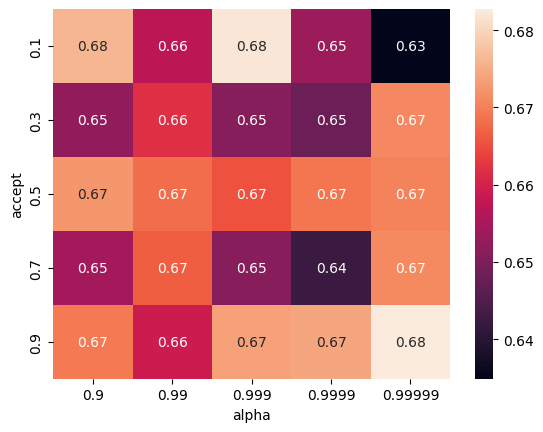

In [75]:
sns.heatmap(df_grouped.pivot(index="accept", columns="alpha", values="Value"), annot=True)

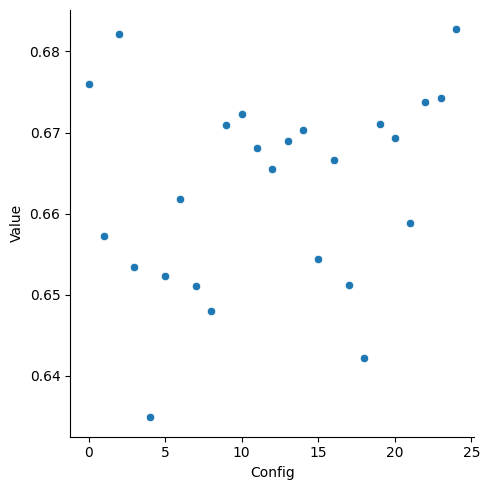

In [76]:
sns.relplot(df_grouped, x="Config", y="Value")

In [77]:
best: list[int] = [df_grouped["Value"].idxmax().item()]
rest: list[int] = df_grouped.index.to_list()[1:]

best

[24]

In [78]:
ttest_rel(df.loc[df["Config"] == 1, ["Atr_id", "Value"]].set_index("Atr_id").sort_index(), df.loc[df["Config"] == 23, ["Atr_id", "Value"]].set_index("Atr_id").sort_index(), alternative="less").pvalue.item()

0.150805772452539

In [79]:
[ttest_rel(df.loc[df["Config"] == 23, ["Atr_id", "Value"]].set_index("Atr_id").sort_index(), df.loc[df["Config"] == config_best, ["Atr_id", "Value"]].set_index("Atr_id").sort_index(), alternative="less").pvalue.item() for config_best in best]

[0.35500302202746126]

In [80]:
i = 0
for config in rest:
    print(false_discovery_control([ttest_rel(df.loc[df["Config"] == config, ["Atr_id", "Value"]].set_index("Atr_id").sort_index(), df.loc[df["Config"] == config_best, ["Atr_id", "Value"]].set_index("Atr_id").sort_index(), alternative="less").pvalue.item() for config_best in best]))
    if all(false_discovery_control([ttest_rel(df.loc[df["Config"] == config, ["Atr_id", "Value"]].set_index("Atr_id").sort_index(), df.loc[df["Config"] == config_best, ["Atr_id", "Value"]].set_index("Atr_id").sort_index(), alternative="less").pvalue.item() for config_best in best]) > 0.05):
        best.append(config)
    else:
        i+=1
    print(best)
    # if i >= 20:
    #     break
rest = rest[len(best)-1:]
len(best)

[0.48815038]
[24, 2]
[0.36912672 0.36912672]
[24, 2, 0]
[0.45649722 0.45649722 0.45649722]
[24, 2, 0, 23]
[0.48276123 0.48276123 0.48276123 0.48276123]
[24, 2, 0, 23, 22]
[0.46286409 0.46286409 0.46286409 0.46286409 0.46286409]
[24, 2, 0, 23, 22, 10]
[0.47839281 0.47839281 0.47839281 0.47839281 0.47839281 0.47839281]
[24, 2, 0, 23, 22, 10, 19]
[0.49569085 0.49569085 0.49569085 0.49569085 0.49569085 0.49569085
 0.49569085]
[24, 2, 0, 23, 22, 10, 19, 9]
[0.48712417 0.48712417 0.48712417 0.48712417 0.48712417 0.48712417
 0.48712417 0.48712417]
[24, 2, 0, 23, 22, 10, 19, 9, 14]
[0.47593705 0.47593705 0.47593705 0.47593705 0.47593705 0.47593705
 0.47593705 0.47593705 0.47593705]
[24, 2, 0, 23, 22, 10, 19, 9, 14, 20]
[0.49214043 0.49214043 0.49214043 0.49214043 0.49214043 0.49214043
 0.49214043 0.49214043 0.49214043 0.49214043]
[24, 2, 0, 23, 22, 10, 19, 9, 14, 20, 13]
[0.48197205 0.48197205 0.48197205 0.48197205 0.48197205 0.48197205
 0.48197205 0.48197205 0.48197205 0.48197205 0.48197205]


24

In [37]:
df_config.loc[list(best)]

,Method,T0_coef,alpha,amp
Id,,,,
65,SA,1.0,0.99995,0.1
66,SA,1.0,0.99995,0.2
35,SA,0.5,0.99990,0.1
68,SA,1.0,0.99995,0.4
101,SA,10.0,0.99900,0.2
70,SA,1.0,0.99999,0.1
40,SA,0.5,0.99995,0.1
41,SA,0.5,0.99995,0.2
106,SA,10.0,0.99950,0.2


In [12]:
df.loc[df["Config"] == 70, ["Atr_id", "Fitness"]].set_index("Atr_id").sort_index()

,Fitness
Atr_id,
0,0.856327
1,0.851429
2,0.755918
3,0.884898
4,0.804082
5,0.844082
6,0.882449
7,0.820408
8,0.748571


In [42]:
df.loc[df["Config"] == 68, ["Atr_id", "Fitness"]].set_index("Atr_id").sort_index()

,Fitness
Atr_id,
0,0.781224
1,0.791837
2,0.831020
3,0.816327
4,0.804082
5,0.547755
6,0.918367
7,0.729796
8,0.770612


In [14]:
df.loc[df["Config"] == 87, ["Atr_id", "Fitness"]].set_index("Atr_id").sort_index()

,Fitness
Atr_id,
0,0.843265
1,0.892245
2,0.795102
3,0.852245
4,0.702857
5,0.761633
6,0.909388
7,0.777143
8,0.693878


In [47]:
ttest_rel(df.loc[df["Config"] == 68, ["Atr_id", "Fitness"]].set_index("Atr_id").sort_index(), df.loc[df["Config"] == 70, ["Atr_id", "Fitness"]].set_index("Atr_id").sort_index(), alternative="less").pvalue

array([0.06180357])

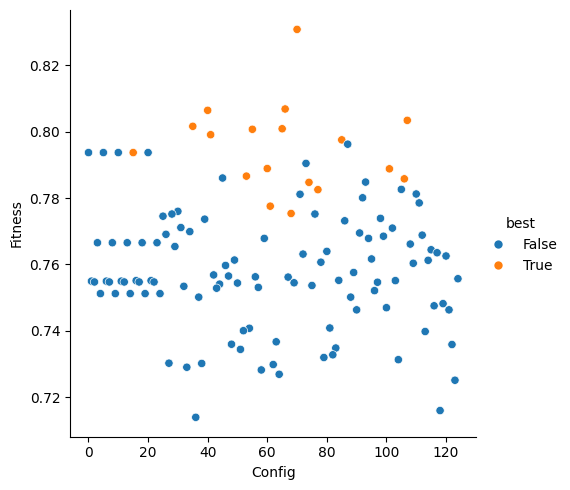

In [38]:
df_grouped_bis = df_grouped.copy()
df_grouped_bis["best"] = [x in best for x in df_grouped_bis.index]
sns.relplot(df_grouped_bis, x="Config", y="Fitness", hue="best")

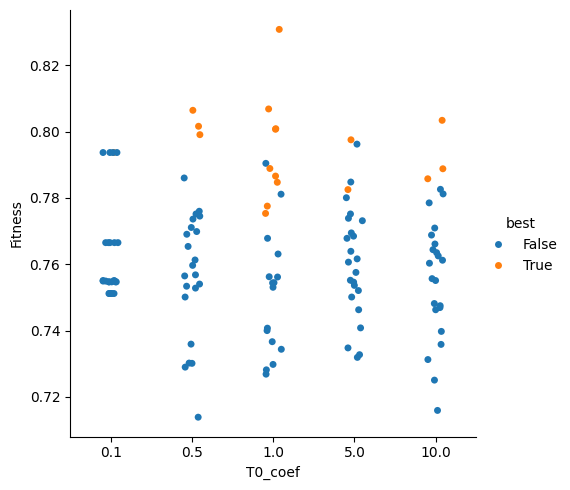

In [ ]:
df_grouped_bis = df_grouped.copy()
df_grouped_bis["best"] = [x in best for x in df_grouped_bis.index]
sns.catplot(df_grouped_bis, x="accept", y="Fitness", hue="best")

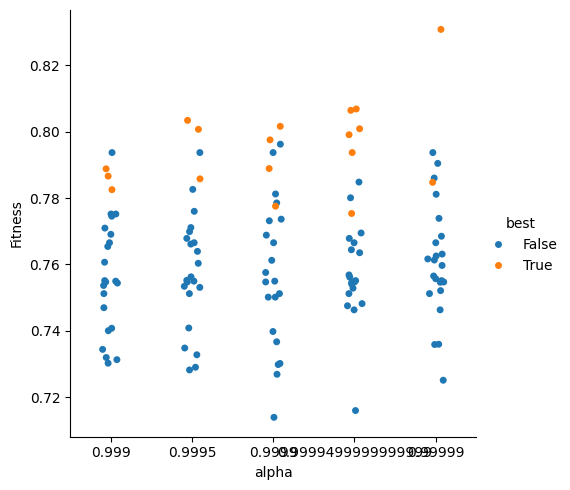

In [40]:
df_grouped_bis = df_grouped.copy()
df_grouped_bis["best"] = [x in best for x in df_grouped_bis.index]
sns.catplot(df_grouped_bis, x="alpha", y="Fitness", hue="best")